<a href="https://colab.research.google.com/github/Dhrupad-05/Projects/blob/main/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COVID-19 DATA ANALYSIS AND VISUALIZATION

1. DATA OVERVIEW
Dataset shape: (187, 15)

Column names:
['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase', 'WHO Region']

First few rows:
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             

/tmp/ipython-input-1538202658.py:146: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


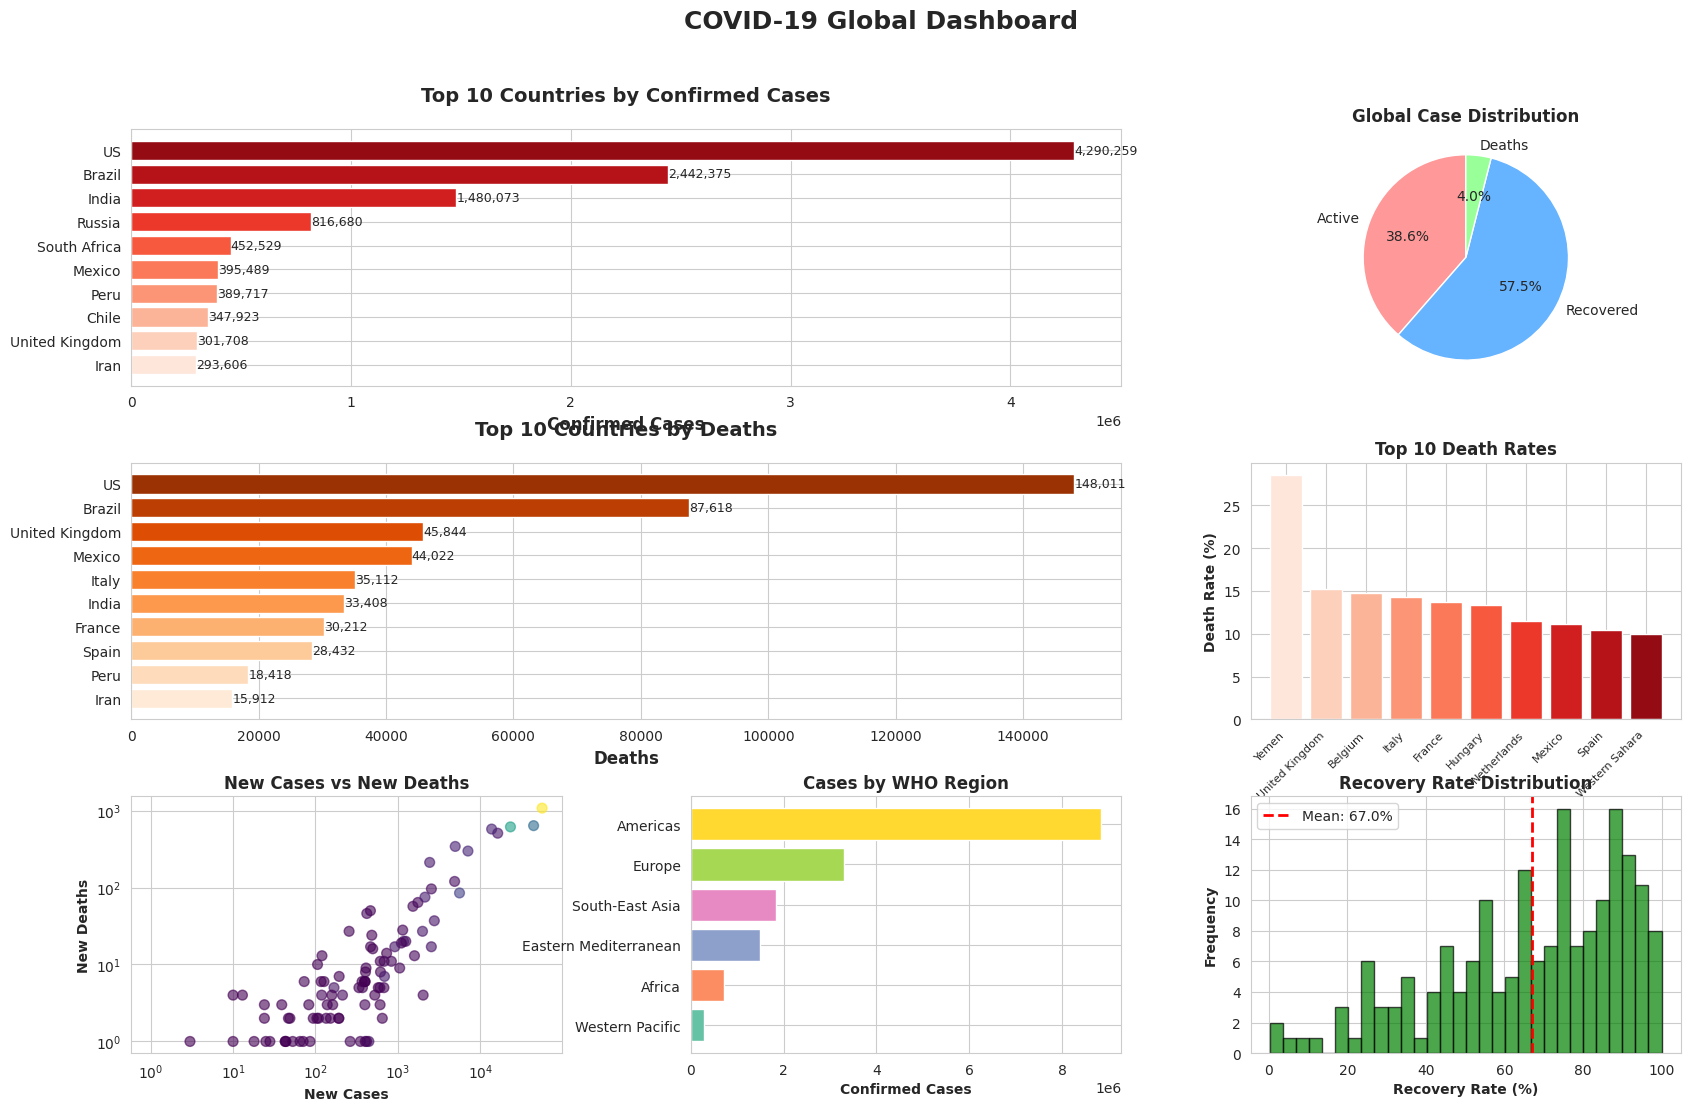

/tmp/ipython-input-1538202658.py:173: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='WHO Region', x='Confirmed', ax=axes[1, 0], palette='Set3')
/tmp/ipython-input-1538202658.py:180: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['Recovered / 100 Cases'] > 0],


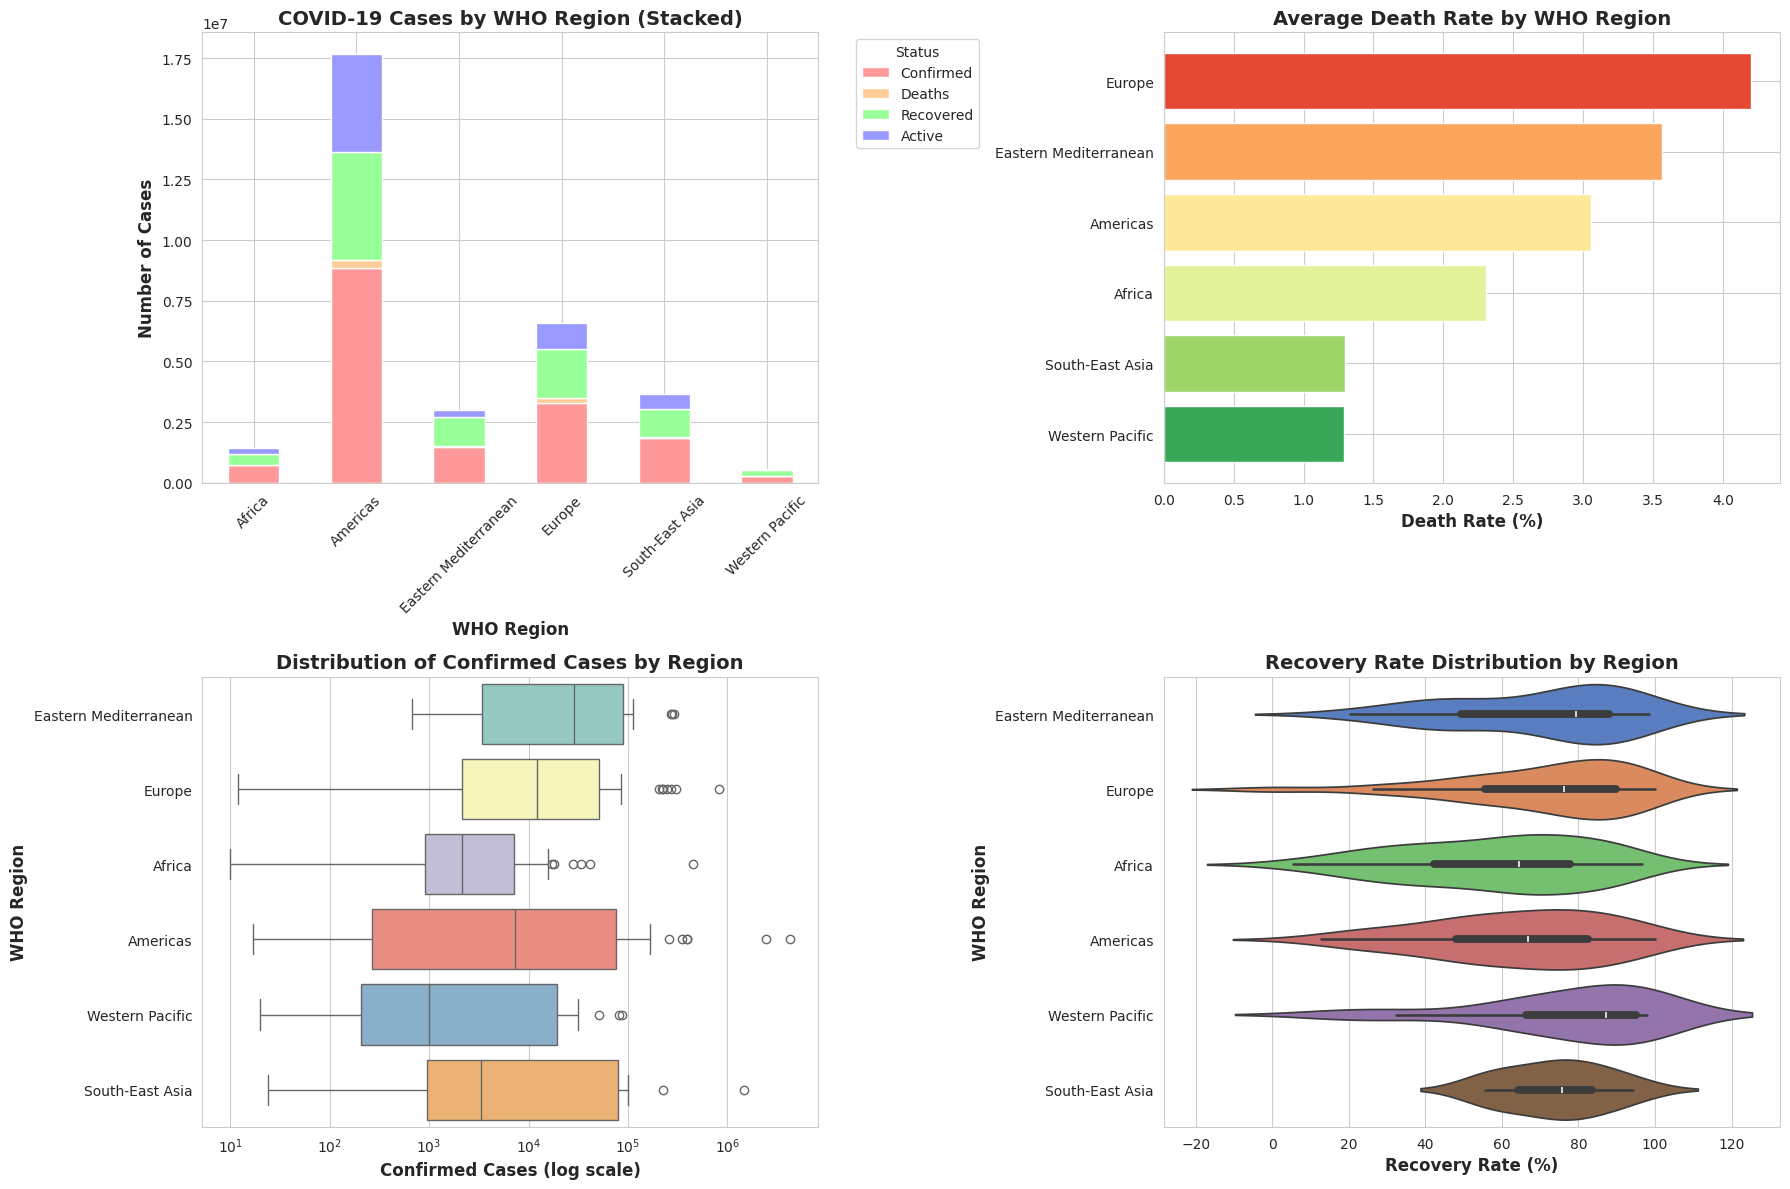

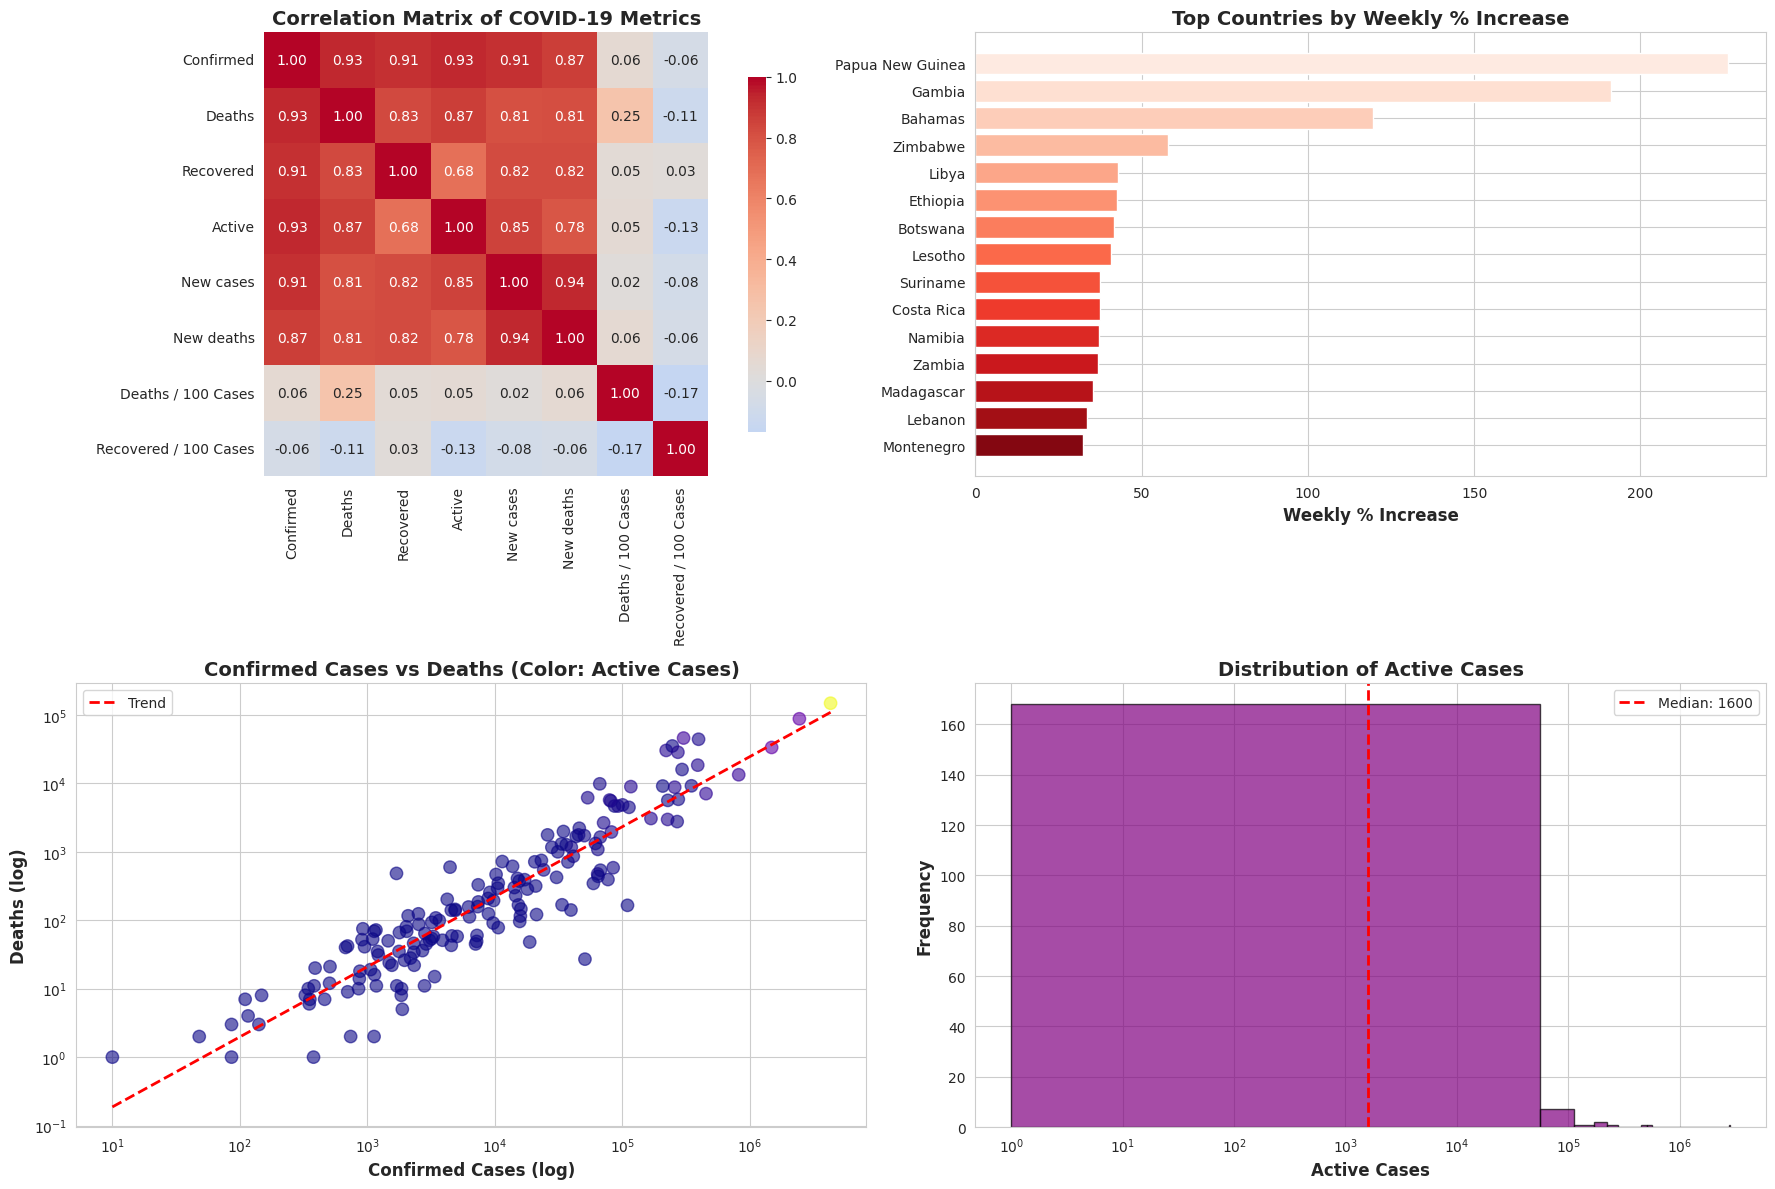

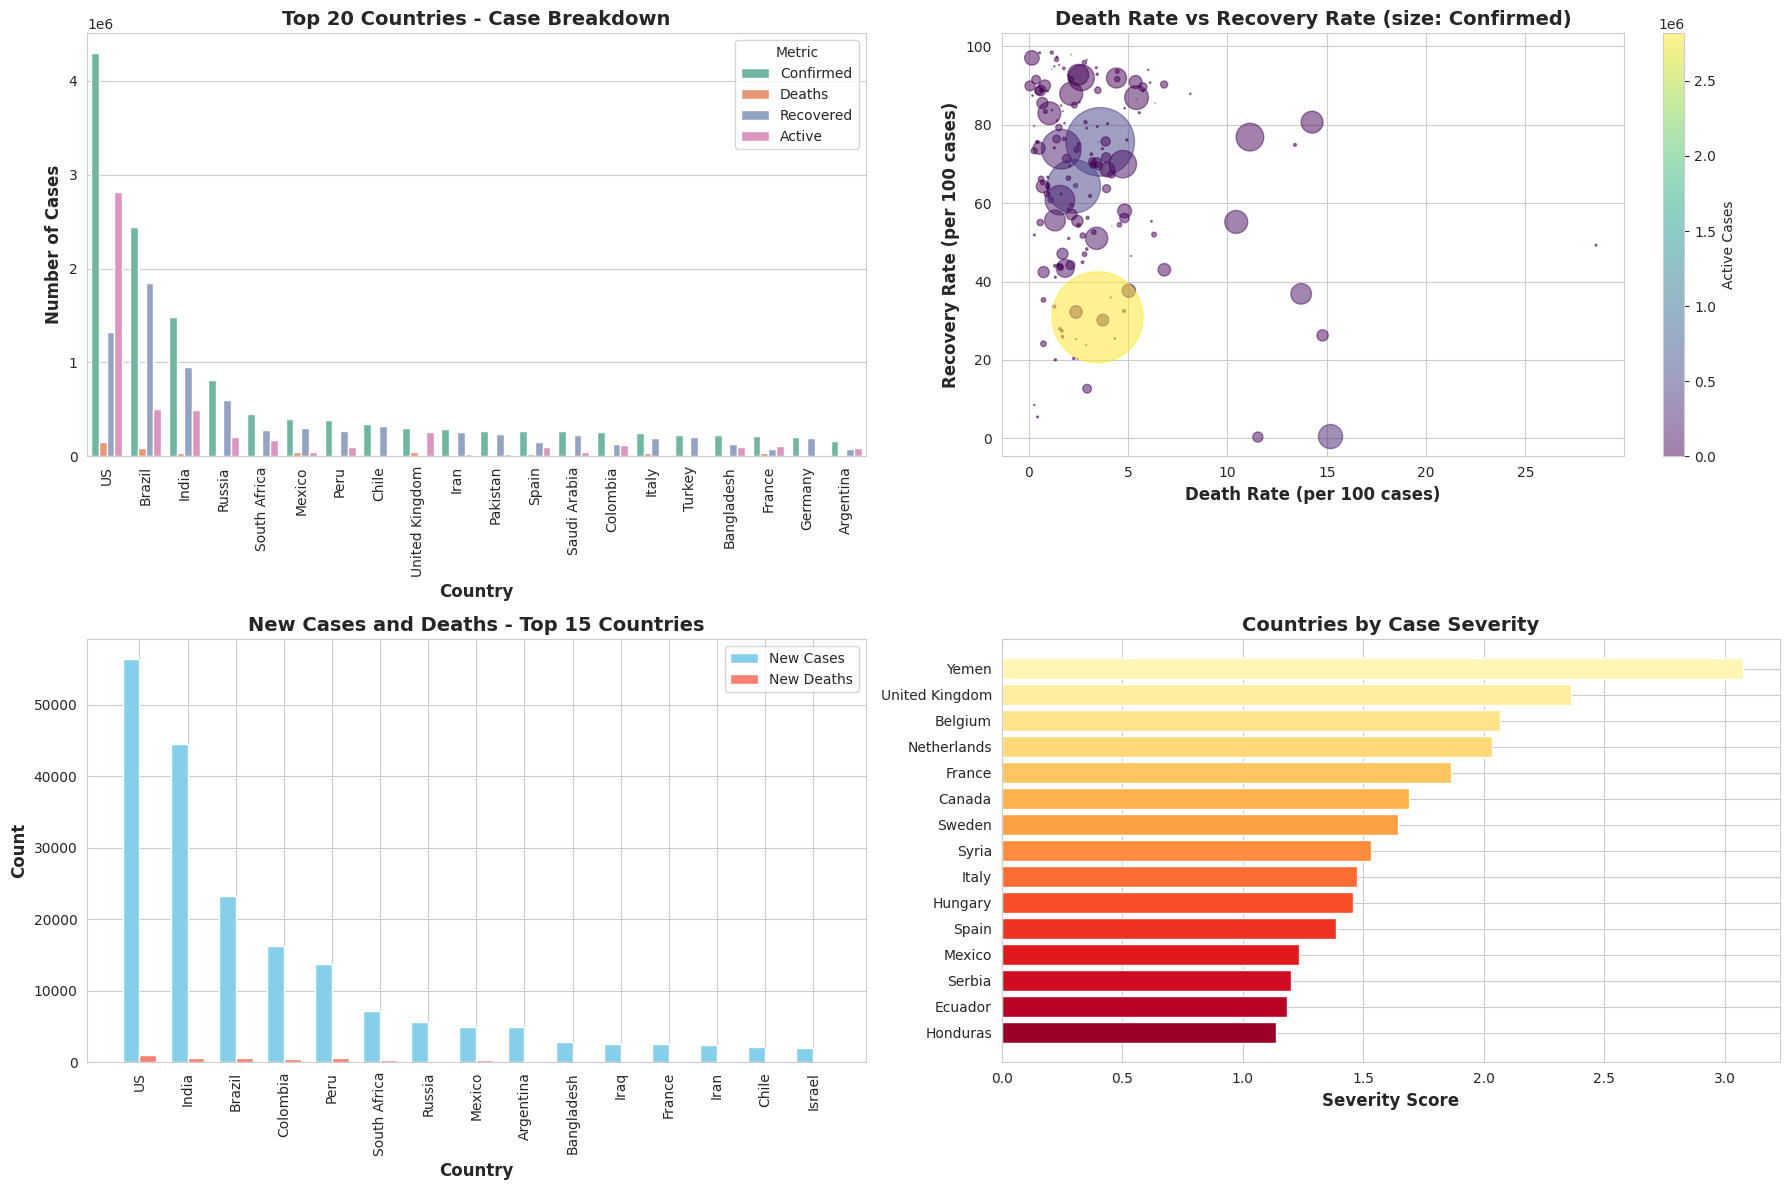

/tmp/ipython-input-1538202658.py:321: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, y='WHO Region', x='Deaths / 100 Cases',
/tmp/ipython-input-1538202658.py:328: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=top_countries_new, y='WHO Region', x='New cases',
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


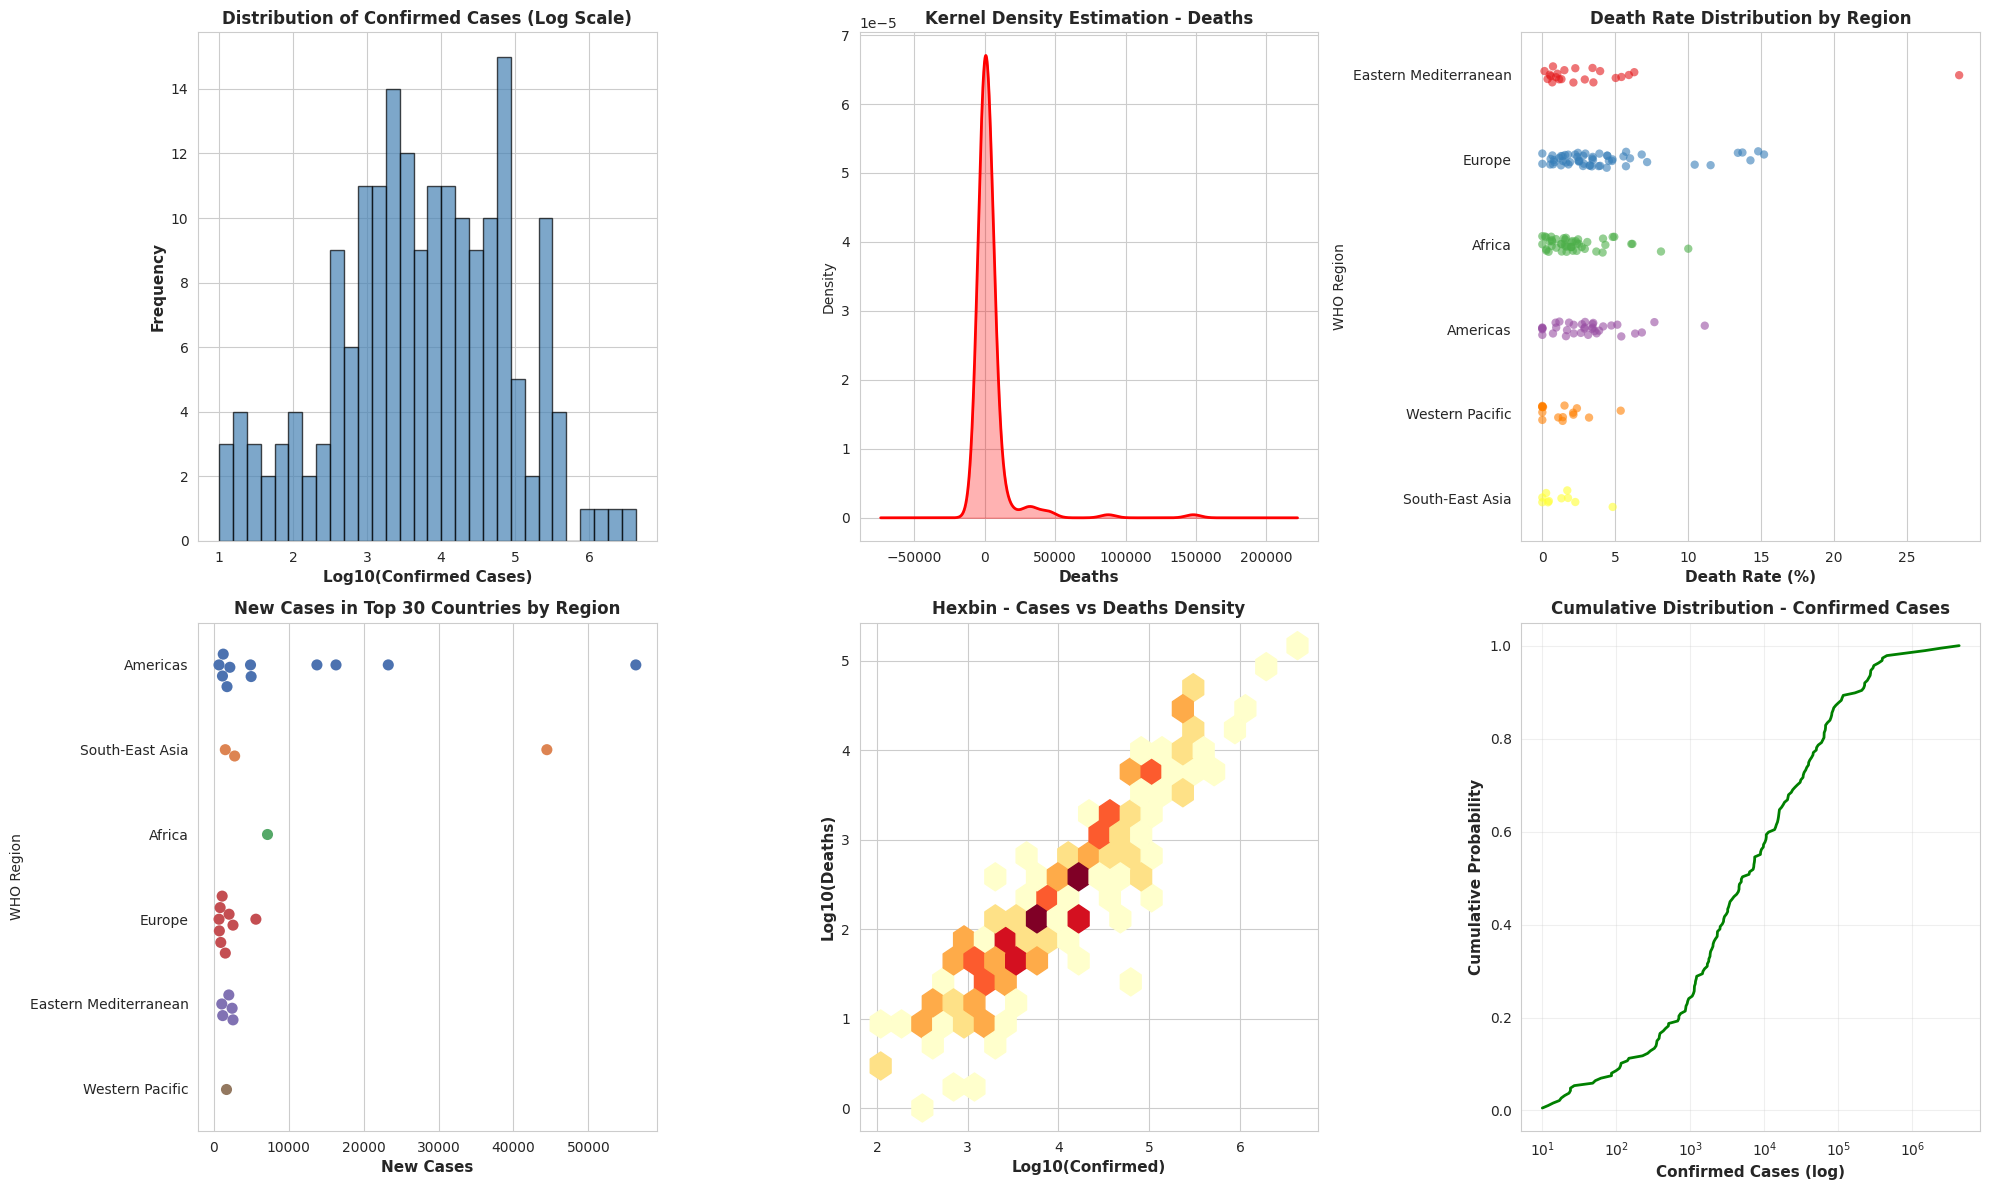


5. SUMMARY STATISTICS BY WHO REGION
                      Confirmed                        Deaths           \
                            sum       mean        std     sum     mean   
WHO Region                                                               
Africa                   723207   15066.81   65087.43   12223   254.65   
Americas                8839286  252551.03  817100.10  342732  9792.34   
Eastern Mediterranean   1490744   67761.09   93399.65   38339  1742.68   
Europe                  3299523   58920.05  127226.69  211144  3770.43   
South-East Asia         1835297  183529.70  461327.18   41349  4134.90   
Western Pacific          292428   18276.75   29427.55    8249   515.56   

                      Recovered              Active             \
                            sum       mean      sum       mean   
WHO Region                                                       
Africa                   440645    9180.10   270339    5632.06   
Americas                4468616 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10


# DATA LOADING AND PREPROCESSING
print("COVID-19 DATA ANALYSIS AND VISUALIZATION")

# Load the data
df = pd.read_csv('country_wise_latest (2).csv')

print("\n1. DATA OVERVIEW")
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())

# Check for missing values
print(f"\n2. MISSING VALUES")
print(df.isnull().sum())

# Data cleaning
print(f"\n3. DATA CLEANING")

# Fill missing values with 0 for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(0)

# Remove any duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")
df = df.drop_duplicates()

# Handle infinite values in percentage columns
df = df.replace([np.inf, -np.inf], 0)

# Strip whitespace from string columns
df['Country/Region'] = df['Country/Region'].str.strip()
df['WHO Region'] = df['WHO Region'].str.strip()

print("Data cleaning completed!")


# DATA STATISTICS
print(f"\n4. GLOBAL STATISTICS")
print(f"Total Countries: {df['Country/Region'].nunique()}")
print(f"Total Confirmed Cases: {df['Confirmed'].sum():,}")
print(f"Total Deaths: {df['Deaths'].sum():,}")
print(f"Total Recovered: {df['Recovered'].sum():,}")
print(f"Total Active Cases: {df['Active'].sum():,}")
print(f"Global Death Rate: {(df['Deaths'].sum() / df['Confirmed'].sum() * 100):.2f}%")
print(f"Global Recovery Rate: {(df['Recovered'].sum() / df['Confirmed'].sum() * 100):.2f}%")


# VISUALIZATION 1: Global Overview Dashboard


fig = plt.figure(figsize=(20, 12))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

# 1. Top 10 Countries by Confirmed Cases
ax1 = fig.add_subplot(gs[0, :2])
top_confirmed = df.nlargest(10, 'Confirmed')[['Country/Region', 'Confirmed']]
colors = sns.color_palette("Reds_r", len(top_confirmed))
bars = ax1.barh(top_confirmed['Country/Region'], top_confirmed['Confirmed'], color=colors)
ax1.set_xlabel('Confirmed Cases', fontsize=12, fontweight='bold')
ax1.set_title('Top 10 Countries by Confirmed Cases', fontsize=14, fontweight='bold', pad=20)
ax1.invert_yaxis()
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', ha='left', va='center', fontsize=9)

# 2. Pie Chart - Global Distribution
ax2 = fig.add_subplot(gs[0, 2])
global_stats = pd.Series({
    'Active': df['Active'].sum(),
    'Recovered': df['Recovered'].sum(),
    'Deaths': df['Deaths'].sum()
})
colors_pie = ['#ff9999', '#66b3ff', '#99ff99']
ax2.pie(global_stats, labels=global_stats.index, autopct='%1.1f%%',
        colors=colors_pie, startangle=90, textprops={'fontsize': 10})
ax2.set_title('Global Case Distribution', fontsize=12, fontweight='bold')

# 3. Top 10 Countries by Deaths
ax3 = fig.add_subplot(gs[1, :2])
top_deaths = df.nlargest(10, 'Deaths')[['Country/Region', 'Deaths']]
bars = ax3.barh(top_deaths['Country/Region'], top_deaths['Deaths'],
                color=sns.color_palette("Oranges_r", len(top_deaths)))
ax3.set_xlabel('Deaths', fontsize=12, fontweight='bold')
ax3.set_title('Top 10 Countries by Deaths', fontsize=14, fontweight='bold', pad=20)
ax3.invert_yaxis()
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax3.text(width, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', ha='left', va='center', fontsize=9)

# 4. Death Rate Comparison
ax4 = fig.add_subplot(gs[1, 2])
top_death_rate = df.nlargest(10, 'Deaths / 100 Cases')[['Country/Region', 'Deaths / 100 Cases']]
ax4.bar(range(len(top_death_rate)), top_death_rate['Deaths / 100 Cases'],
        color=sns.color_palette("Reds", len(top_death_rate)))
ax4.set_xticks(range(len(top_death_rate)))
ax4.set_xticklabels(top_death_rate['Country/Region'], rotation=45, ha='right', fontsize=8)
ax4.set_ylabel('Death Rate (%)', fontsize=10, fontweight='bold')
ax4.set_title('Top 10 Death Rates', fontsize=12, fontweight='bold')

# 5. New Cases vs New Deaths Scatter
ax5 = fig.add_subplot(gs[2, 0])
scatter_data = df[df['New cases'] > 0]
ax5.scatter(scatter_data['New cases'], scatter_data['New deaths'],
            alpha=0.6, c=scatter_data['Confirmed'], cmap='viridis', s=50)
ax5.set_xlabel('New Cases', fontsize=10, fontweight='bold')
ax5.set_ylabel('New Deaths', fontsize=10, fontweight='bold')
ax5.set_title('New Cases vs New Deaths', fontsize=12, fontweight='bold')
ax5.set_xscale('log')
ax5.set_yscale('log')

# 6. WHO Region Distribution
ax6 = fig.add_subplot(gs[2, 1])
region_cases = df.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=True)
ax6.barh(region_cases.index, region_cases.values,
         color=sns.color_palette("Set2", len(region_cases)))
ax6.set_xlabel('Confirmed Cases', fontsize=10, fontweight='bold')
ax6.set_title('Cases by WHO Region', fontsize=12, fontweight='bold')

# 7. Recovery Rate Distribution
ax7 = fig.add_subplot(gs[2, 2])
recovery_data = df[df['Recovered / 100 Cases'] > 0]['Recovered / 100 Cases']
ax7.hist(recovery_data, bins=30, color='green', alpha=0.7, edgecolor='black')
ax7.axvline(recovery_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {recovery_data.mean():.1f}%')
ax7.set_xlabel('Recovery Rate (%)', fontsize=10, fontweight='bold')
ax7.set_ylabel('Frequency', fontsize=10, fontweight='bold')
ax7.set_title('Recovery Rate Distribution', fontsize=12, fontweight='bold')
ax7.legend()

plt.suptitle('COVID-19 Global Dashboard', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('covid_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()


# VISUALIZATION 2: Regional Analysis

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Cases by Region (Stacked Bar)
region_summary = df.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()
region_summary.plot(kind='bar', stacked=True, ax=axes[0, 0],
                    color=['#ff9999', '#ffcc99', '#99ff99', '#9999ff'])
axes[0, 0].set_title('COVID-19 Cases by WHO Region (Stacked)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('WHO Region', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Number of Cases', fontsize=12, fontweight='bold')
axes[0, 0].legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Average Death Rate by Region
region_death_rate = df.groupby('WHO Region')['Deaths / 100 Cases'].mean().sort_values()
axes[0, 1].barh(region_death_rate.index, region_death_rate.values,
                color=sns.color_palette("RdYlGn_r", len(region_death_rate)))
axes[0, 1].set_title('Average Death Rate by WHO Region', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Death Rate (%)', fontsize=12, fontweight='bold')

# 3. Box Plot - Confirmed Cases Distribution by Region
sns.boxplot(data=df, y='WHO Region', x='Confirmed', ax=axes[1, 0], palette='Set3')
axes[1, 0].set_xscale('log')
axes[1, 0].set_title('Distribution of Confirmed Cases by Region', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Confirmed Cases (log scale)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('WHO Region', fontsize=12, fontweight='bold')

# 4. Violin Plot - Recovery Rate by Region
sns.violinplot(data=df[df['Recovered / 100 Cases'] > 0],
               y='WHO Region', x='Recovered / 100 Cases',
               ax=axes[1, 1], palette='muted')
axes[1, 1].set_title('Recovery Rate Distribution by Region', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Recovery Rate (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('WHO Region', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('regional_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


# VISUALIZATION 3: Correlation and Trend Analysis

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Correlation Heatmap
corr_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
             'New deaths', 'Deaths / 100 Cases', 'Recovered / 100 Cases']
correlation_matrix = df[corr_cols].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, ax=axes[0, 0], cbar_kws={'shrink': 0.8})
axes[0, 0].set_title('Correlation Matrix of COVID-19 Metrics', fontsize=14, fontweight='bold')

# 2. Weekly Change Analysis
top_increase = df.nlargest(15, '1 week % increase')[['Country/Region', '1 week % increase']]
top_increase = top_increase[top_increase['1 week % increase'] < 1000]  # Remove outliers
axes[0, 1].barh(top_increase['Country/Region'], top_increase['1 week % increase'],
                color=sns.color_palette("Reds", len(top_increase)))
axes[0, 1].set_title('Top Countries by Weekly % Increase', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Weekly % Increase', fontsize=12, fontweight='bold')
axes[0, 1].invert_yaxis()

# 3. Confirmed vs Deaths Regression
valid_data = df[(df['Confirmed'] > 0) & (df['Deaths'] > 0)]
axes[1, 0].scatter(valid_data['Confirmed'], valid_data['Deaths'],
                   alpha=0.6, c=valid_data['Active'], cmap='plasma', s=80)
axes[1, 0].set_xscale('log')
axes[1, 0].set_yscale('log')
axes[1, 0].set_xlabel('Confirmed Cases (log)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Deaths (log)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Confirmed Cases vs Deaths (Color: Active Cases)', fontsize=14, fontweight='bold')

# Add regression line
log_confirmed = np.log10(valid_data['Confirmed'])
log_deaths = np.log10(valid_data['Deaths'])
z = np.polyfit(log_confirmed, log_deaths, 1)
p = np.poly1d(z)
x_line = np.linspace(log_confirmed.min(), log_confirmed.max(), 100)
axes[1, 0].plot(10**x_line, 10**p(x_line), "r--", linewidth=2, label='Trend')
axes[1, 0].legend()

# 4. Active Cases Distribution
axes[1, 1].hist(df[df['Active'] > 0]['Active'], bins=50,
                color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Active Cases', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Distribution of Active Cases', fontsize=14, fontweight='bold')
axes[1, 1].set_xscale('log')
axes[1, 1].axvline(df['Active'].median(), color='red', linestyle='--',
                   linewidth=2, label=f'Median: {df["Active"].median():.0f}')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('correlation_trends.png', dpi=300, bbox_inches='tight')
plt.show()

# VISUALIZATION 4: Detailed Country Comparisons

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Top 20 Countries - Multiple Metrics
top_20 = df.nlargest(20, 'Confirmed')[['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
top_20_melted = top_20.melt(id_vars='Country/Region',
                             value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'])
sns.barplot(data=top_20_melted, x='Country/Region', y='value',
            hue='variable', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Top 20 Countries - Case Breakdown', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Country', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Number of Cases', fontsize=12, fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=90)
axes[0, 0].legend(title='Metric')

# 2. Death Rate vs Recovery Rate
scatter_data = df[(df['Deaths / 100 Cases'] > 0) & (df['Recovered / 100 Cases'] > 0)]
scatter = axes[0, 1].scatter(scatter_data['Deaths / 100 Cases'],
                             scatter_data['Recovered / 100 Cases'],
                             s=scatter_data['Confirmed']/1000,
                             alpha=0.5, c=scatter_data['Active'], cmap='viridis')
axes[0, 1].set_xlabel('Death Rate (per 100 cases)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Recovery Rate (per 100 cases)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Death Rate vs Recovery Rate (size: Confirmed)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, ax=axes[0, 1], label='Active Cases')

# 3. New Cases by Top Countries
top_new_cases = df.nlargest(15, 'New cases')[['Country/Region', 'New cases', 'New deaths']]
x = np.arange(len(top_new_cases))
width = 0.35
axes[1, 0].bar(x - width/2, top_new_cases['New cases'], width, label='New Cases', color='skyblue')
axes[1, 0].bar(x + width/2, top_new_cases['New deaths'], width, label='New Deaths', color='salmon')
axes[1, 0].set_xlabel('Country', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1, 0].set_title('New Cases and Deaths - Top 15 Countries', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(top_new_cases['Country/Region'], rotation=90)
axes[1, 0].legend()

# 4. Countries by Case Severity
df['Severity_Score'] = (df['Deaths'] * 10 + df['Active']) / (df['Confirmed'] + 1)
top_severity = df.nlargest(15, 'Severity_Score')[['Country/Region', 'Severity_Score']]
axes[1, 1].barh(top_severity['Country/Region'], top_severity['Severity_Score'],
                color=sns.color_palette("YlOrRd", len(top_severity)))
axes[1, 1].set_xlabel('Severity Score', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Countries by Case Severity', fontsize=14, fontweight='bold')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.savefig('country_comparisons.png', dpi=300, bbox_inches='tight')
plt.show()


# VISUALIZATION 5: Statistical Distributions

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Log-scale distribution of Confirmed Cases
axes[0, 0].hist(np.log10(df[df['Confirmed'] > 0]['Confirmed']),
                bins=30, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Log10(Confirmed Cases)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Distribution of Confirmed Cases (Log Scale)', fontsize=12, fontweight='bold')

# 2. KDE Plot - Deaths Distribution
df[df['Deaths'] > 0]['Deaths'].plot(kind='kde', ax=axes[0, 1], color='red', linewidth=2)
axes[0, 1].set_xlabel('Deaths', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Kernel Density Estimation - Deaths', fontsize=12, fontweight='bold')
axes[0, 1].fill_between(axes[0, 1].lines[0].get_xdata(),
                         axes[0, 1].lines[0].get_ydata(), alpha=0.3, color='red')

# 3. Strip Plot - WHO Regions vs Death Rate
sns.stripplot(data=df, y='WHO Region', x='Deaths / 100 Cases',
              ax=axes[0, 2], palette='Set1', alpha=0.6, size=6)
axes[0, 2].set_title('Death Rate Distribution by Region', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Death Rate (%)', fontsize=11, fontweight='bold')

# 4. Swarm Plot - Top Countries New Cases
top_countries_new = df.nlargest(30, 'New cases')
sns.swarmplot(data=top_countries_new, y='WHO Region', x='New cases',
              ax=axes[1, 0], palette='deep', size=8)
axes[1, 0].set_title('New Cases in Top 30 Countries by Region', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('New Cases', fontsize=11, fontweight='bold')

# 5. Joint Distribution
from scipy import stats
valid = df[(df['Confirmed'] > 100) & (df['Deaths'] > 0)]
x_data = np.log10(valid['Confirmed'])
y_data = np.log10(valid['Deaths'])
axes[1, 1].hexbin(x_data, y_data, gridsize=20, cmap='YlOrRd', mincnt=1)
axes[1, 1].set_xlabel('Log10(Confirmed)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Log10(Deaths)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Hexbin - Cases vs Deaths Density', fontsize=12, fontweight='bold')

# 6. Cumulative Distribution
sorted_confirmed = np.sort(df[df['Confirmed'] > 0]['Confirmed'])
cumulative = np.arange(1, len(sorted_confirmed) + 1) / len(sorted_confirmed)
axes[1, 2].plot(sorted_confirmed, cumulative, linewidth=2, color='green')
axes[1, 2].set_xscale('log')
axes[1, 2].set_xlabel('Confirmed Cases (log)', fontsize=11, fontweight='bold')
axes[1, 2].set_ylabel('Cumulative Probability', fontsize=11, fontweight='bold')
axes[1, 2].set_title('Cumulative Distribution - Confirmed Cases', fontsize=12, fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('statistical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# SUMMARY STATISTICS TABLE


print("\n5. SUMMARY STATISTICS BY WHO REGION")
summary = df.groupby('WHO Region').agg({
    'Confirmed': ['sum', 'mean', 'std'],
    'Deaths': ['sum', 'mean'],
    'Recovered': ['sum', 'mean'],
    'Active': ['sum', 'mean'],
    'Deaths / 100 Cases': 'mean',
    'Recovered / 100 Cases': 'mean'
}).round(2)
print(summary)

print("\n6. TOP 10 COUNTRIES SUMMARY")

top_10_summary = df.nlargest(10, 'Confirmed')[['Country/Region', 'Confirmed',
                                                 'Deaths', 'Recovered', 'Active',
                                                 'Deaths / 100 Cases',
                                                 'Recovered / 100 Cases']]
print(top_10_summary.to_string(index=False))

print("ANALYSIS COMPLETE! All visualizations saved as PNG files.")